<a href="https://colab.research.google.com/github/silmarildust/SIP-2024/blob/main/figures/fig1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [5]:
df = pd.read_excel("/content/GRAB APP AND API DATA.xlsx", skiprows=13)

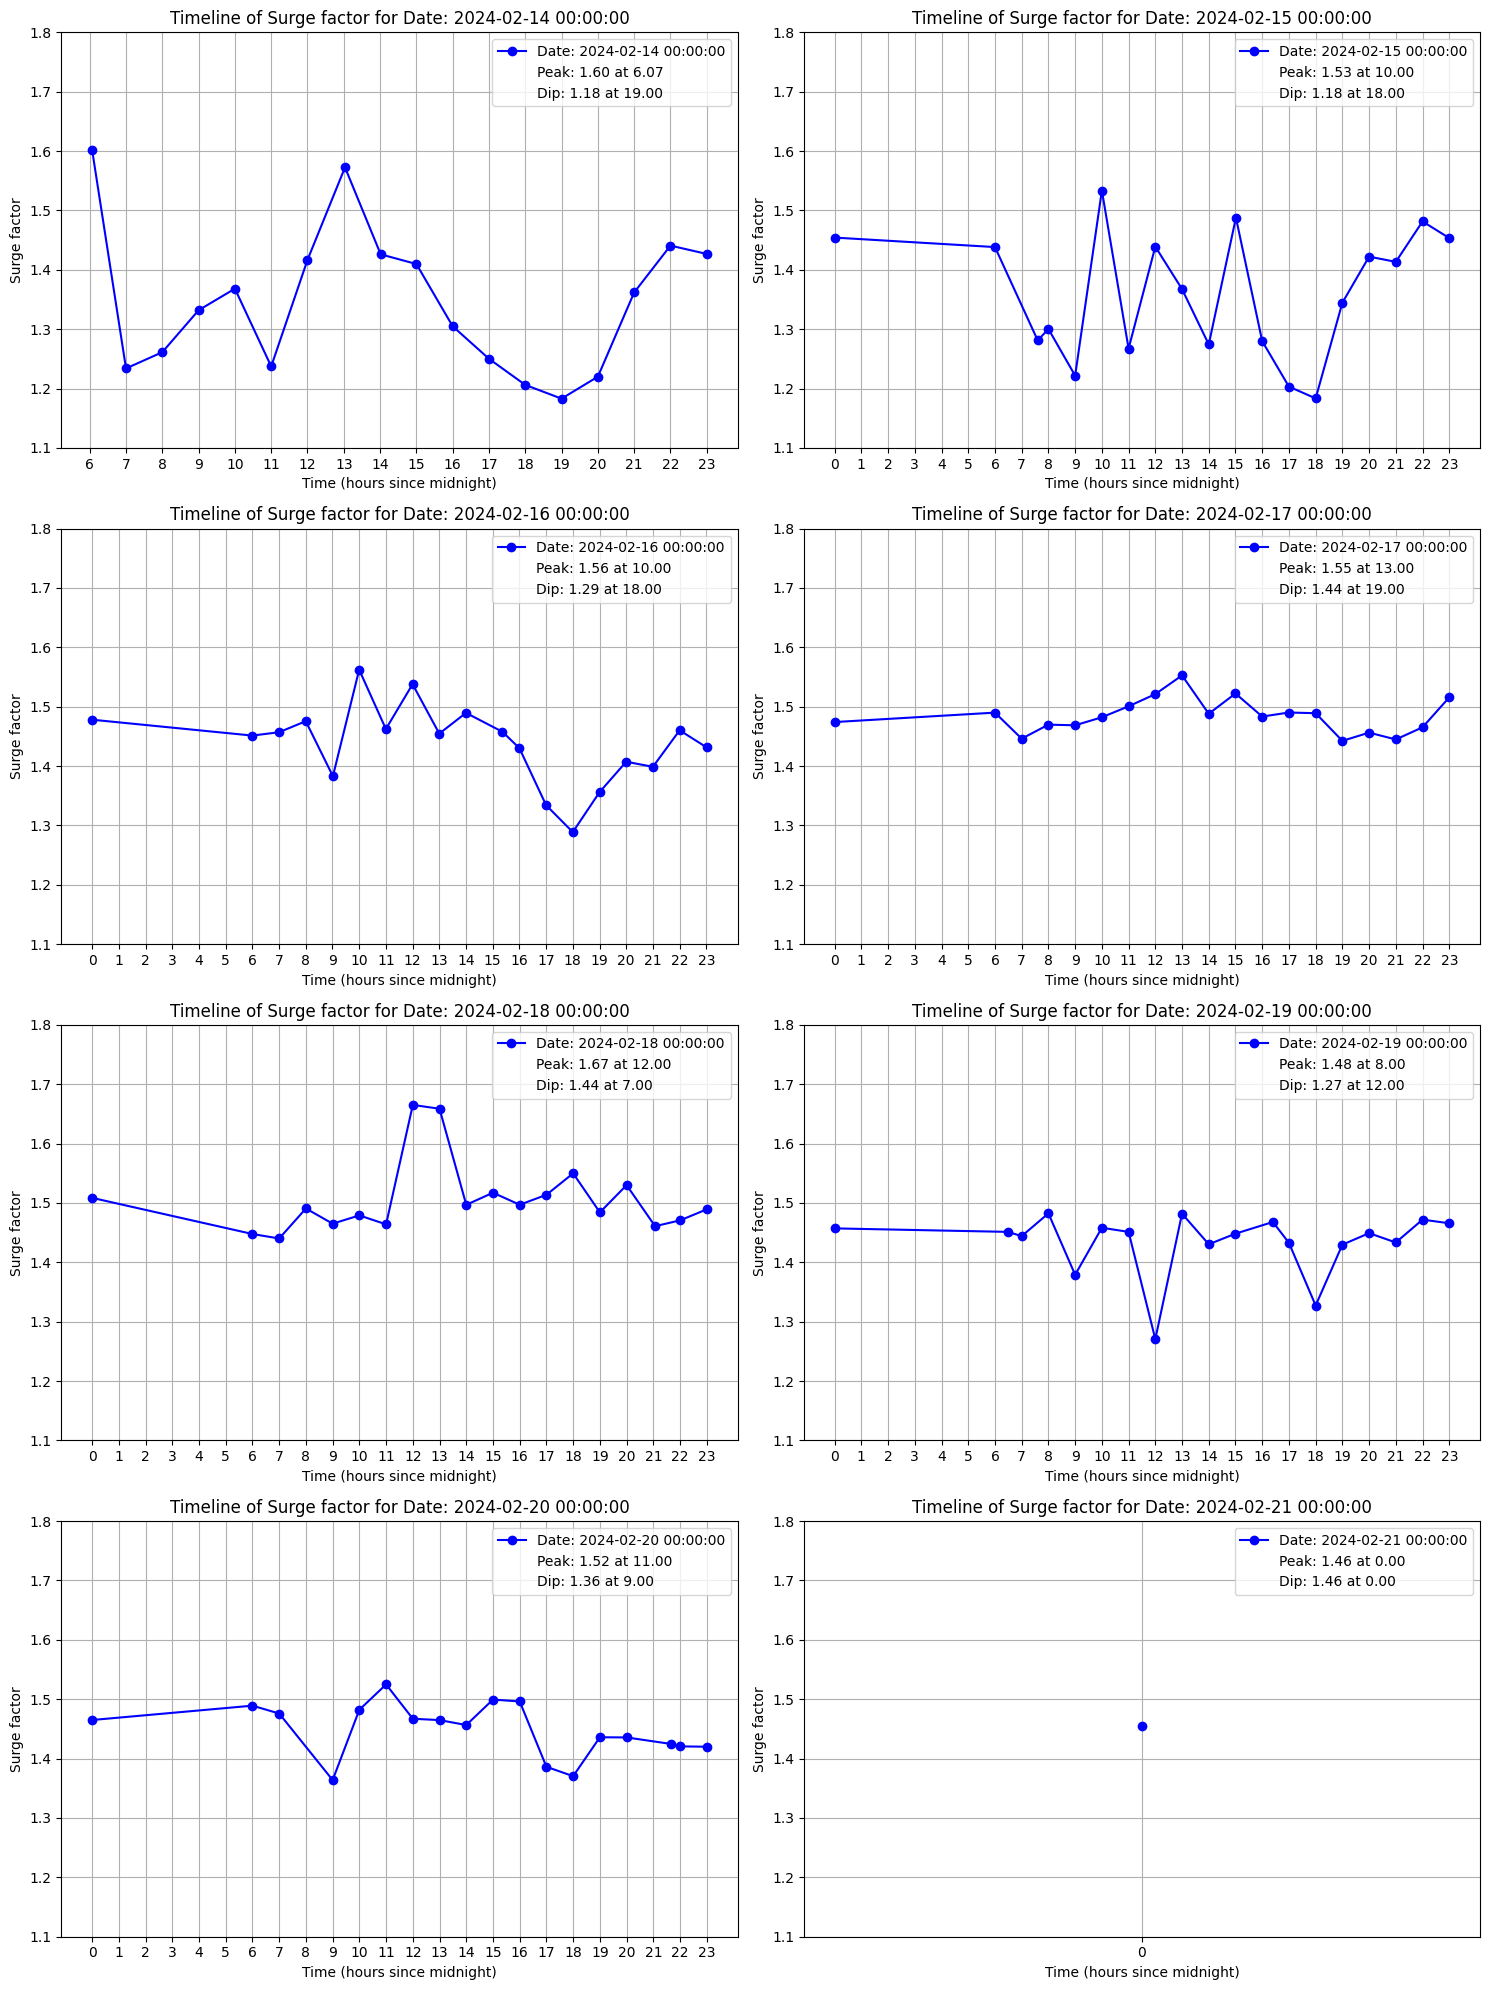

,Date,Peak Time,Peak Value,Dip Time,Dip Value
0,2024-02-14,6.066667,1.601630,19.0,1.183068
1,2024-02-15,10.000000,1.533583,18.0,1.183505
2,2024-02-16,10.000000,1.562349,18.0,1.288803
3,2024-02-17,13.000000,1.552739,19.0,1.442477
4,2024-02-18,12.000000,1.665120,7.0,1.440171
5,2024-02-19,8.000000,1.482449,12.0,1.270688
6,2024-02-20,11.000000,1.524905,9.0,1.363827
7,2024-02-21,0.000000,1.455215,0.0,1.455215


In [6]:
# DO NOT EDIT !!!

df = pd.read_excel("/content/GRAB APP AND API DATA.xlsx", skiprows=13)

df = df[(df['app_destination']=="UP Alumni Hostel")]

df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')
grouped1 = df.groupby('date')

df['app_booking hour'] = df['app_booking hour'].astype(str).str[:-3]
df['app_booking hour'] = pd.to_datetime(df['app_booking hour'], format='%H:%M').dt.time

df['app_booking hour_hours'] = df['app_booking hour'].apply(lambda t: t.hour + t.minute / 60 + t.second / 3600)

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
table_data = []
for i, (date, group) in enumerate(grouped1):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    ax.plot(group['app_booking hour_hours'], group['Surge factor'], marker='o', linestyle='-', label=f'Date: {date}', color='b')
    ax.set_xlabel('Time (hours since midnight)')
    ax.set_ylabel('Surge factor')
    ax.set_title(f'Timeline of Surge factor for Date: {date}')
    ax.grid(True)
    ax.set_ylim(1.1, 1.8)
    ax.set_xticks(range(0, int(group['app_booking hour_hours'].max()) + 1))

    peak_time = group['app_booking hour_hours'][group['Surge factor'].idxmax()]
    peak_value = group['Surge factor'].max()
    dip_time = group['app_booking hour_hours'][group['Surge factor'].idxmin()]
    dip_value = group['Surge factor'].min()

    ax.plot([], [], ' ', label=f'Peak: {peak_value:.2f} at {peak_time:.2f}')
    ax.plot([], [], ' ', label=f'Dip: {dip_value:.2f} at {dip_time:.2f}')

    ax.legend()

    table_data.append([date, peak_time, peak_value, dip_time, dip_value])

plt.tight_layout()
plt.show()

table_df = pd.DataFrame(table_data, columns=['Date', 'Peak Time', 'Peak Value', 'Dip Time', 'Dip Value'])

display(table_df)